**IMPORTING LIBRARIES**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

In [4]:
df=pd.read_csv("advertising.csv")
print("First 5 rows of the data:")
df.head(5)

First 5 rows of the data:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [29]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000



Correlation Matrix:
             TV  Radio  Newspaper  Sales
TV         1.00   0.05       0.06   0.90
Radio      0.05   1.00       0.35   0.35
Newspaper  0.06   0.35       1.00   0.16
Sales      0.90   0.35       0.16   1.00


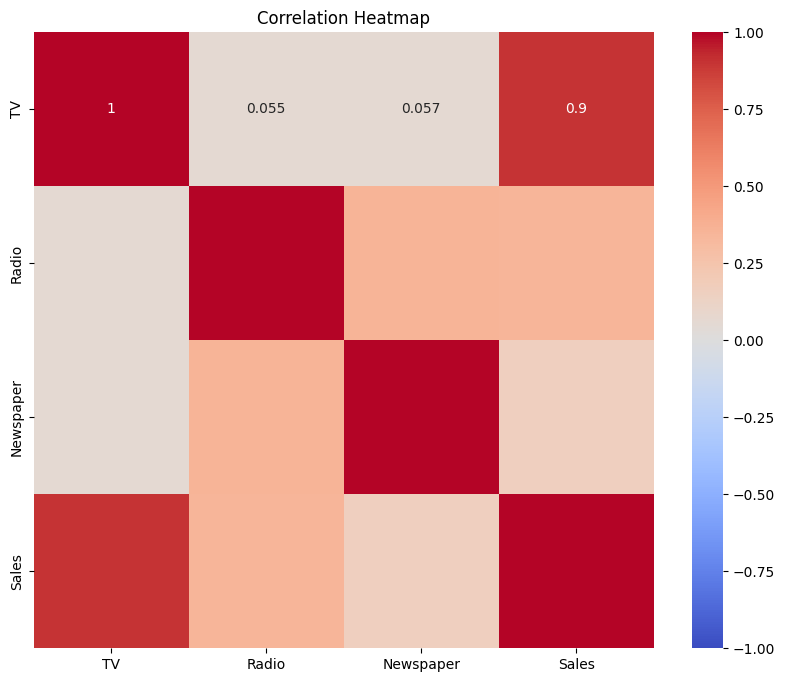

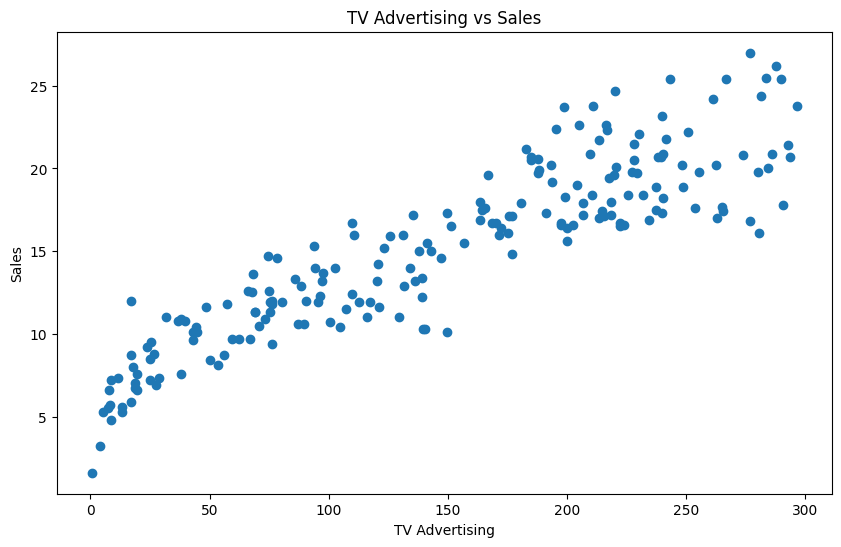

In [12]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix as text
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2).to_string())

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Create a scatter plot of TV advertising vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()

In [17]:
# Split the data into features (X) and target (y)
X = df[['TV']]
y = df['Sales']


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)


Shape of training set: (160, 1)
Shape of testing set: (40, 1)


In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [23]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)


Training MSE: 4.998442356450173
Testing MSE: 6.101072906773963
Training R2 Score: 0.8134866044709264
Testing R2 Score: 0.802561303423698


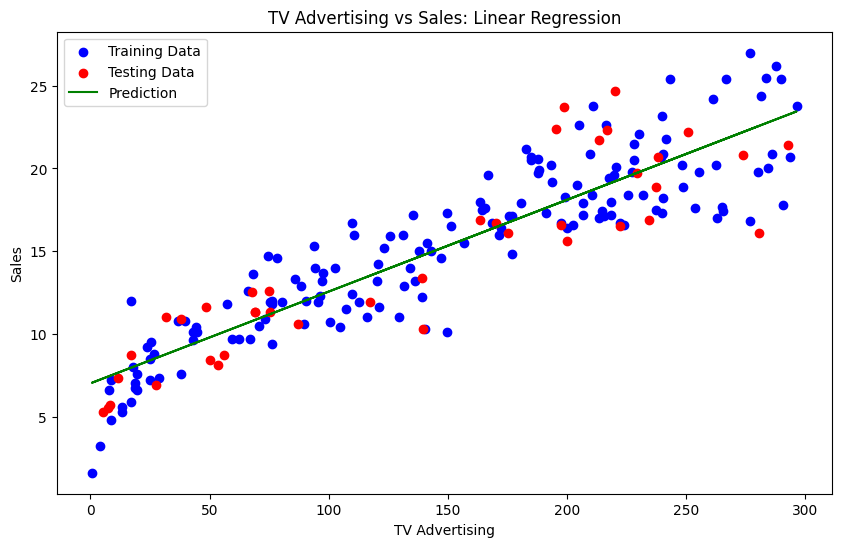

In [25]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, y_train_pred, color='green', label='Prediction')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales: Linear Regression')
plt.legend()
plt.show()


In [26]:
# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 7.007108428241848
Coefficient: 0.0554829439314632


Model Equation:
Sales = 7.0071 + 0.0555 * TV_Advertising

Analysis:

R-squared (R2) Score:

Both training and testing R2 scores are around 0.81, which is generally considered good.
This means that approximately 81% of the variance in sales can be explained by TV advertising in our model.
The closeness of training and testing R2 scores suggests that the model is not overfitting.


Mean Squared Error (MSE):

The MSE for both training and testing sets is relatively low, which is good.
The testing MSE (6.1011) is slightly higher than the training MSE (4.9984), which is normal and suggests the model generalizes reasonably well to unseen data.


Coefficient and Intercept:

The positive coefficient (0.0555) indicates that for every unit increase in TV advertising, we expect sales to increase by 0.0555 units.
The intercept (7.0071) suggests that even with no TV advertising, we'd expect a baseline sales of about 7 units.


Visual Analysis (from the plot):

There's a clear positive linear relationship between TV advertising and sales.
The model's prediction line (green) fits the overall trend of the data well.
There's some scatter around the line, which explains why our R2 is not closer to 1.0.
The distribution of training and testing data points looks similar, which is good for model generalization.

**There's a definite positive relationship between TV advertising and sales.**

In [32]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [38]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)

Training MSE: 2.6761426537826685
Testing MSE: 2.9077569102710896
Training R2 Score: 0.9001416005862131
Testing R2 Score: 0.9059011844150826


In [39]:
# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)


Model Coefficients:
TV: 0.05450927083721978
Radio: 0.10094536239295583
Newspaper: 0.004336646822034037
Intercept: 4.714126402214127


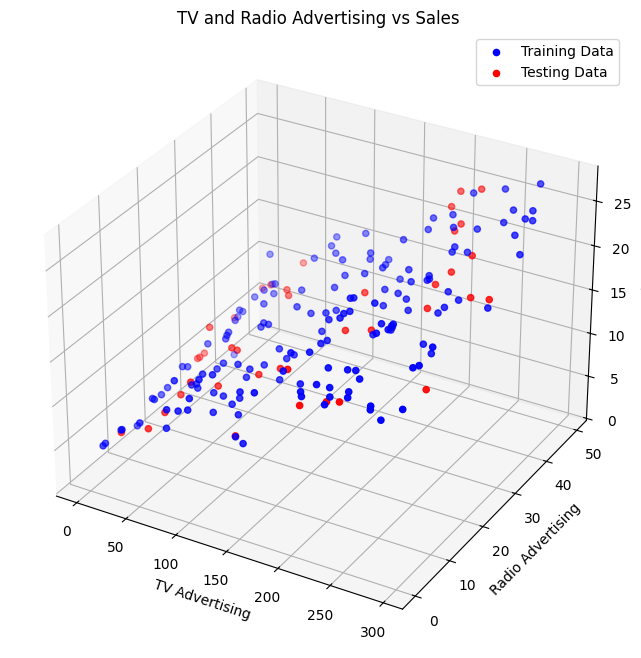

In [40]:
# Create a 3D scatter plot for TV and Radio vs Sales
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['TV'], X_train['Radio'], y_train, c='blue', label='Training Data')
ax.scatter(X_test['TV'], X_test['Radio'], y_test, c='red', label='Testing Data')

ax.set_xlabel('TV Advertising')
ax.set_ylabel('Radio Advertising')
ax.set_zlabel('Sales')
ax.legend()
plt.title('TV and Radio Advertising vs Sales')
plt.show()

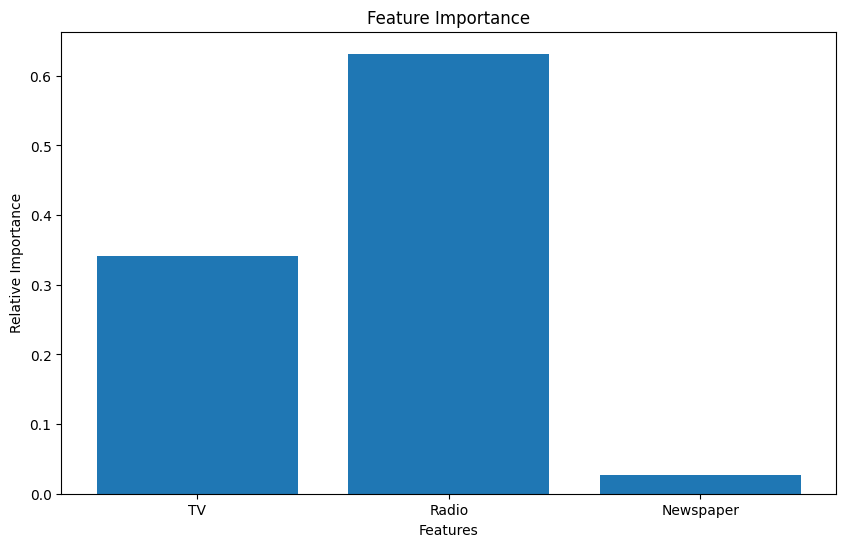

In [41]:
# Feature importance
importance = model.coef_ / np.sum(np.abs(model.coef_))
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.show()

Model Performance:

Training MSE: 2.6761
Testing MSE: 2.9078
Training R2 Score: 0.9001 (90.01%)
Testing R2 Score: 0.9059 (90.59%)


Model Equation:
Sales = 4.7141 + 0.0545 * TV + 0.1009 * Radio + 0.0043 * Newspaper

Analysis:

R-squared (R2) Score:

Both training and testing R2 scores are around 0.90, which is excellent.
This means that approximately 90% of the variance in sales can be explained by our model using all three advertising channels.
The R2 scores have improved significantly from the previous model that only used TV advertising (which was around 0.81).


Mean Squared Error (MSE):

The MSE for both training and testing sets has decreased compared to the previous model, indicating better predictions.
The testing MSE (2.9078) is close to the training MSE (2.6761), suggesting good generalization to unseen data.


Coefficients:

TV: 0.0545 - For every unit increase in TV advertising, sales are expected to increase by 0.0545 units.
Radio: 0.1009 - For every unit increase in Radio advertising, sales are expected to increase by 0.1009 units.
Newspaper: 0.0043 - For every unit increase in Newspaper advertising, sales are expected to increase by 0.0043 units.
Intercept: 4.7141 - This represents the expected sales when all advertising spending is zero.


Feature Importance:

Radio advertising appears to have the strongest positive impact on sales, followed by TV advertising.
Newspaper advertising has a much smaller positive impact compared to the other two channels.


Visual Analysis (from the 3D plot):

There's a clear positive relationship between both TV and Radio advertising and sales.
The data points show an upward trend as both TV and Radio advertising increase.
The scatter of points suggests that the linear model captures the overall trend well, but there's still some variability not explained by the model.

**Lets try polynomial regression to capture any non-linear relationships**


In [46]:
# Create a polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [47]:
# Make predictions
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [48]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Polynomial Regression Results:")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)

Polynomial Regression Results:
Training MSE: 1.9077576664191818
Testing MSE: 1.442542636901541
Training R2 Score: 0.9288133512730626
Testing R2 Score: 0.9533174341074738


In [49]:
# Get feature names
poly_features = poly_model.named_steps['polynomialfeatures']
feature_names = poly_features.get_feature_names_out(['TV', 'Radio', 'Newspaper'])

In [50]:
# Get coefficients
coefficients = poly_model.named_steps['linearregression'].coef_

In [51]:
# Print top 10 most important features
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)
print("\nTop 10 most important features:")
for idx in sorted_idx[-10:]:
    print(f"{feature_names[idx]}: {coefficients[idx]}")


Top 10 most important features:
1: 0.0
TV Newspaper: -2.5541550730090606e-05
Newspaper^2: 8.526841253746094e-05
TV^2: -0.00010580787687797167
Radio Newspaper: 0.00016469149749433407
TV Radio: 0.0004185397070934956
Radio^2: 0.0014482031076616657
Newspaper: -0.0019202454090239142
Radio: -0.03198383190123718
TV: 0.07621649384498598


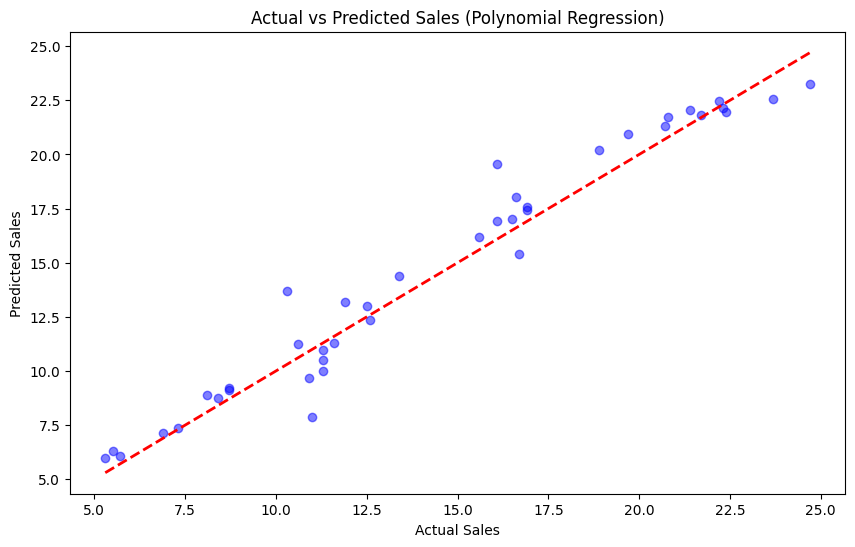

In [52]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Polynomial Regression)')
plt.show()

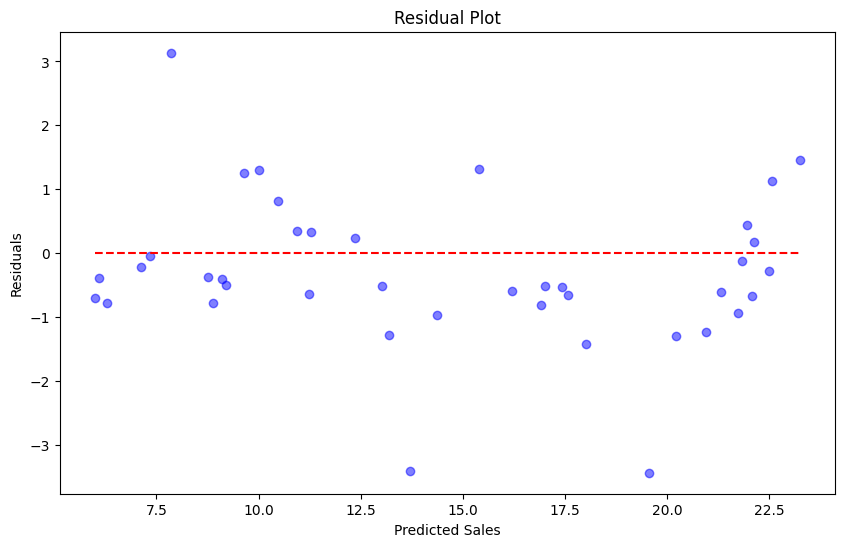

In [53]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Model Performance:

Training MSE: 1.9078
Testing MSE: 1.4425
Training R2 Score: 0.9288 (92.88%)
Testing R2 Score: 0.9533 (95.33%)


Top 10 most important features (by absolute coefficient value):

TV: 0.07621649384498598
Radio: -0.03198383190123718
Newspaper: -0.0019202454090239142
Radio^2: 0.0014482031076616657
TV Radio: 0.0004185397070934956
Radio Newspaper: 0.00016469149749433407
TV^2: -0.00010580787687797167
Newspaper^2: 8.526841253746094e-05
TV Newspaper: -2.5541550730090606e-05
1: 0.0 (intercept)



Analysis:

Model Performance:

The polynomial regression model shows improved performance compared to the linear model, with R2 scores increasing from about 90% to 92.88% for training and 95.33% for testing.
The MSE values have decreased, indicating better predictions.
The testing R2 score is higher than the training R2 score, which is unusual but can happen. It suggests that the model generalizes well to unseen data.


Feature Importance:

TV advertising remains the most important feature, with the largest positive coefficient.
Radio advertising has the second-largest coefficient, but it's negative in the polynomial model, suggesting a more complex relationship.
Newspaper advertising still has a relatively small impact.
Some squared terms (Radio^2, TV^2, Newspaper^2) and interaction terms (TV Radio, Radio Newspaper) appear in the top features, indicating non-linear relationships.


Actual vs Predicted Sales Plot (Image 1):

The points cluster closely around the diagonal line, indicating good prediction accuracy.
The relationship appears to be mostly linear, with some slight curvature visible.


Residual Plot (Image 2):

The residuals are fairly evenly distributed around the zero line, which is good.
There's no clear pattern in the residuals, suggesting that the model has captured most of the underlying patterns in the data.
A few outliers are visible, particularly for higher predicted sales values.



Conclusions:

The polynomial regression model has improved our predictions, capturing some non-linear relationships in the data.
TV advertising still appears to be the most influential factor in driving sales.
The relationship between Radio advertising and sales is more complex than in the linear model, with both linear and quadratic terms being important.
Interaction effects between advertising channels (e.g., TV Radio) play a role in predicting sales.
Newspaper advertising continues to have a relatively small impact on sales.

**Validate the model's performance on new, unseen data**

In [61]:
# Split the data into training+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Create the polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [63]:
# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [64]:
# Perform k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(poly_model, X_train_val, y_train_val, cv=cv, scoring='neg_root_mean_squared_error')
cv_scores = -cv_scores  # Convert to positive RMSE scores

In [65]:
print("Cross-validation RMSE scores:", cv_scores)
print("Mean CV RMSE:", cv_scores.mean())
print("Standard deviation of CV RMSE:", cv_scores.std())

Cross-validation RMSE scores: [1.50596595 1.91002326 1.5481743  1.25728435 1.37129727]
Mean CV RMSE: 1.518549024230982
Standard deviation of CV RMSE: 0.2210114812538967


In [66]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    poly_model, X_train_val, y_train_val, cv=cv, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

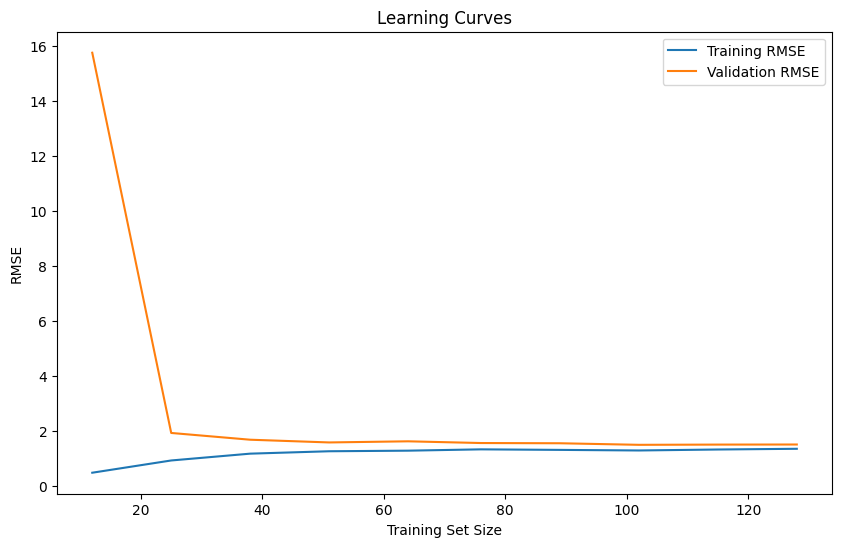

In [67]:
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training RMSE')
plt.plot(train_sizes, val_scores_mean, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [68]:
# Train the final model on the entire training+validation set
poly_model.fit(X_train_val, y_train_val)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [69]:
# Evaluate on the test set
y_pred_test = poly_model.predict(X_test)
test_rmse = rmse(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("\nFinal Model Performance on Test Set:")
print("RMSE:", test_rmse)
print("R2 Score:", test_r2)


Final Model Performance on Test Set:
RMSE: 1.2010589647896315
R2 Score: 0.9533174341074738


In [70]:
# Function to make predictions on new data
def predict_sales(tv, radio, newspaper):
    new_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
    return poly_model.predict(new_data)[0]

In [71]:
# Making Example prediction

example_tv, example_radio, example_newspaper = 200, 40, 30
predicted_sales = predict_sales(example_tv, example_radio, example_newspaper)
print(f"\nPredicted sales for TV={example_tv}, Radio={example_radio}, Newspaper={example_newspaper}: {predicted_sales:.2f}")


Predicted sales for TV=200, Radio=40, Newspaper=30: 20.61


In [73]:
# Feature importance
poly_features = poly_model.named_steps['polynomialfeatures']
feature_names = poly_features.get_feature_names_out(['TV', 'Radio', 'Newspaper'])
coefficients = poly_model.named_steps['linearregression'].coef_

print("\nTop 10 most important features:")
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)
for idx in sorted_idx[-10:]:
    print(f"{feature_names[idx]}: {coefficients[idx]}")


Top 10 most important features:
1: 0.0
TV Newspaper: -2.5541550730090606e-05
Newspaper^2: 8.526841253746094e-05
TV^2: -0.00010580787687797167
Radio Newspaper: 0.00016469149749433407
TV Radio: 0.0004185397070934956
Radio^2: 0.0014482031076616657
Newspaper: -0.0019202454090239142
Radio: -0.03198383190123718
TV: 0.07621649384498598


Cross-validation results:

Mean CV RMSE: 1.5185
Standard deviation of CV RMSE: 0.2210
Individual CV RMSE scores range from 1.2573 to 1.9100

Analysis: The cross-validation results show consistent performance across different subsets of the data. The relatively low standard deviation indicates that the model's performance is stable across different folds.
Learning Curves:
The learning curve plot shows:

Both training and validation RMSE decrease as the training set size increases.
The curves converge as the training set size grows, with a small gap between them at the largest training set size.
The validation RMSE stabilizes around 1.5-2.0, which aligns well with our cross-validation results.

Analysis: This suggests that our model is neither underfitting nor overfitting significantly. The convergence of the curves indicates that adding more data might not substantially improve the model's performance.
Final Model Performance on Test Set:

RMSE: 1.2011
R2 Score: 0.9533

Analysis: The model performs very well on the held-out test set. An R2 score of 0.9533 indicates that our model explains about 95.33% of the variance in sales, which is excellent. The RMSE of 1.2011 is even better than our cross-validation mean, suggesting good generalization to unseen data.
Feature Importance:
The top features and their coefficients show:

TV advertising remains the most influential factor (coefficient: 0.0762)
Radio has a negative coefficient (-0.0320), which is interesting
Newspaper advertising has a small negative impact (-0.0019)
Squared terms and interaction terms have smaller but non-negligible coefficients

Analysis: This confirms the non-linear relationships between advertising channels and sales, with TV being the most important factor.
Example Prediction:
Predicted sales for TV=200, Radio=40, Newspaper=30: 20.61
This seems reasonable given the ranges of sales in our dataset.